# Classify Gender From The Images Using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the MLP model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>
<ol>8. Improving the MLP model</ol>
<ol>9. Defining the CNN model architecture</ol>
<ol>10. Fine Tuning CNN model</ol>
<ol>11. Visualizing CNN Model</ol>
<ol>12. Gender Classification Through Transfer Learning</ol>

## Loading the libraries

In [1]:
# import necessary libraries and functions
import os
import shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from timeit import default_timer as timer
from tqdm.notebook import tqdm_notebook

SEED = 42

> Mount Drive and copy data to local environment, in case of using Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
shutil.copytree("/content/drive/MyDrive/Analytics_Vidya_Black_Belt/Data_Science_BlackBelt/12-Fundamentals-Depp-Learing/Gender_Classification/", "./sample_data/input/")

'./sample_data/input/'

In [2]:
os.chdir("./sample_data/")

In [12]:
!unzip input/train_nLPp5K8.zip -d input/

Streaming output truncated to the last 5000 lines.
  inflating: input/images/5251.jpg   
  inflating: input/images/5252.jpg   
  inflating: input/images/5253.jpg   
  inflating: input/images/5254.jpg   
  inflating: input/images/5255.jpg   
  inflating: input/images/5256.jpg   
  inflating: input/images/5257.jpg   
  inflating: input/images/5258.jpg   
  inflating: input/images/5259.jpg   
  inflating: input/images/5260.jpg   
  inflating: input/images/5261.jpg   
  inflating: input/images/5262.jpg   
  inflating: input/images/5263.jpg   
  inflating: input/images/5264.jpg   
  inflating: input/images/5265.jpg   
  inflating: input/images/5266.jpg   
  inflating: input/images/5267.jpg   
  inflating: input/images/5268.jpg   
  inflating: input/images/5269.jpg   
  inflating: input/images/5270.jpg   
  inflating: input/images/5271.jpg   
  inflating: input/images/5272.jpg   
  inflating: input/images/5273.jpg   
  inflating: input/images/5274.jpg   
  inflating: input/images/5275.jpg   

## 1. Loading datasets

In [3]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test_fkwGUNG.csv")
submission = pd.read_csv("input/sample_submission_yAxnSkN.csv")

In [15]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [16]:
test.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [17]:
submission.head()

,image_names,class
0,5603.jpg,0
1,1286.jpg,0
2,9815.jpg,0
3,8865.jpg,0
4,9306.jpg,0


In [4]:
# create random number generator
rng = np.random.RandomState(SEED)

In [5]:
train["class"].value_counts(normalize=True)

1    0.506232
0    0.493768
Name: class, dtype: float64

In [6]:
train_sample = train.sample(1800)
del train
train_sample["class"].value_counts(normalize=True)

1    0.510556
0    0.489444
Name: class, dtype: float64

In [7]:
len(os.listdir("./images"))

17423

> Reading images

In [10]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in tqdm_notebook(train_sample.image_names):
    # loading the image using its name
    img = plt.imread('./input/images/' + img_name)
    img = img/255.0
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = train_sample["class"].values

  0%|          | 0/2200 [00:00<?, ?it/s]

In [11]:
# shape of the image
X.shape

(2200, 224, 224, 3)

In [12]:
X.min(), X.max()

(0.0, 1.0)

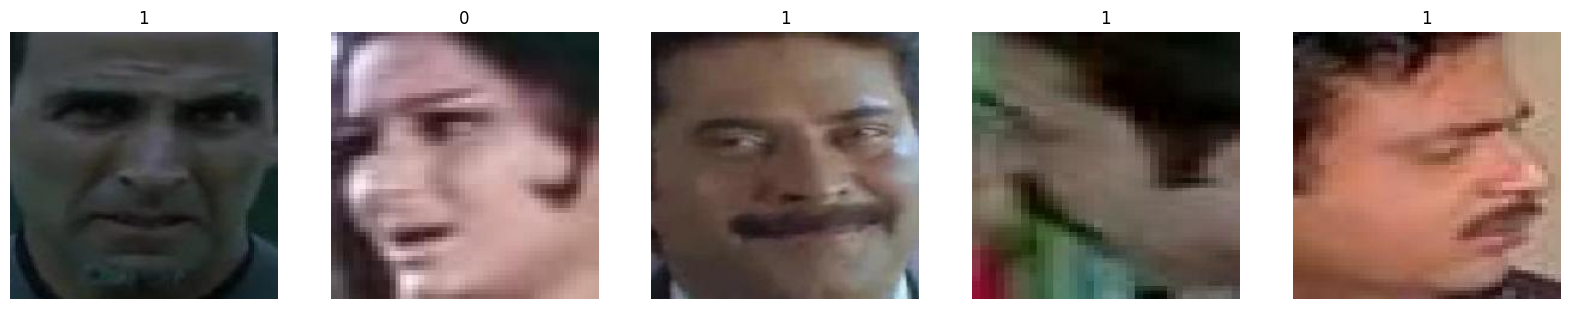

In [25]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*40])
    ax[i].set_title(y[i*40])
    ax[i].axis('off')

## 2. Pre-processing the data

In [13]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2200, 150528)

## 3. Creating training and validation set

In [14]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.25, random_state=SEED)

In [15]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1650, 150528), (1650,)), ((550, 150528), (550,)))

## 4. Defining the MLP model architecture

In [29]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [30]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15058001 (57.44 MB)
Trainable params: 15058001 (57.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Compiling the model

In [31]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [32]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU not found. Please make sure GPU acceleration is enabled in Colab.")


Default GPU Device: /device:GPU:0


## 6. Training the model

In [33]:
# training the model
model_history = model.fit(X_train, y_train, epochs=25, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/25
13/13 [==============================] - 7s 162ms/step - loss: 0.6859 - accuracy: 0.5576 - val_loss: 0.6714 - val_accuracy: 0.6527
Epoch 2/25
13/13 [==============================] - 2s 153ms/step - loss: 0.6736 - accuracy: 0.6170 - val_loss: 0.6609 - val_accuracy: 0.6745
Epoch 3/25
13/13 [==============================] - 1s 105ms/step - loss: 0.6657 - accuracy: 0.6364 - val_loss: 0.6566 - val_accuracy: 0.6964
Epoch 4/25
13/13 [==============================] - 1s 112ms/step - loss: 0.6583 - accuracy: 0.6691 - val_loss: 0.6474 - val_accuracy: 0.7091
Epoch 5/25
13/13 [==============================] - 1s 100ms/step - loss: 0.6520 - accuracy: 0.6715 - val_loss: 0.6393 - val_accuracy: 0.6782
Epoch 6/25
13/13 [==============================] - 1s 77ms/step - loss: 0.6448 - accuracy: 0.6727 - val_loss: 0.6360 - val_accuracy: 0.7218
Epoch 7/25
13/13 [==============================] - 1s 74ms/step - loss: 0.6385 - accuracy: 0.6927 - val_loss: 0.6303 - val_accuracy: 0.7236
Epoch 8/

## 7. Evaluating model performance

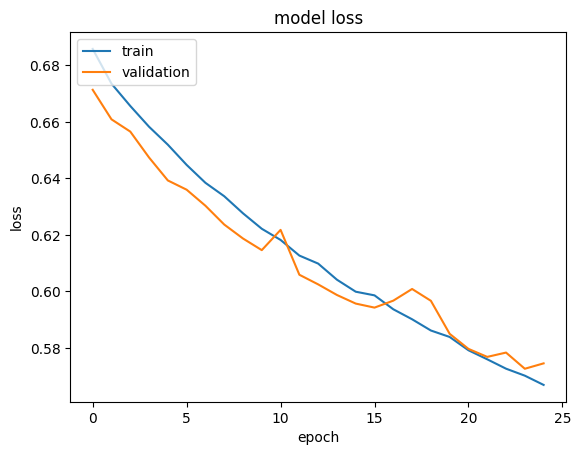

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

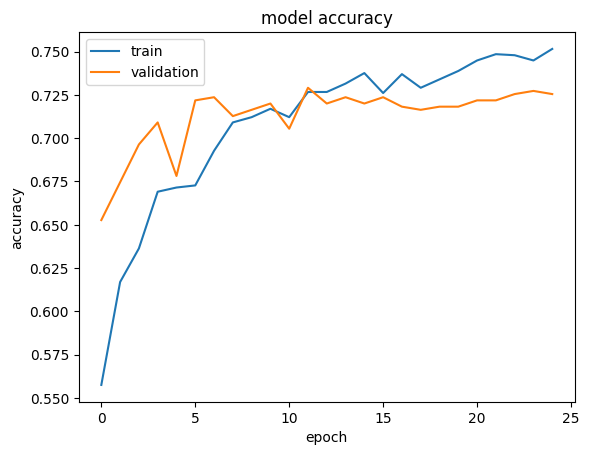

In [35]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
# getting predictions in the form of class
predictions = []
for img_name in tqdm_notebook(test.image_names):
    img = plt.imread('input/images/' + img_name)
    img = img/255.0
    img = img.reshape(1, 224*224*3)
    predictions.append(model.predict(img))

  0%|          | 0/5227 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step


In [37]:
predictions = [1 if pred[0][0] > .5 else 0 for pred in predictions]

In [38]:
submission["class"] = predictions
submission.head()

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,1
4,9306.jpg,0


In [40]:
submission.to_csv("results/submission_MLP_2.csv", index=False)

## 8. Improving the MLP model

* Early Stopping
* Dropout Layer
* BatchNormalization Layer
* Gradient Clipping
* Model Checkpoints

In [16]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Setting up optimizer and gradient clipping
adam = Adam(learning_rate=1e-5, clipvalue=1)

# Setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=6, mode='min')

In [17]:
from keras.layers import BatchNormalization, Dropout
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(50, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                        

In [19]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [20]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU not found. Please make sure GPU acceleration is enabled in Colab.")


Default GPU Device: /device:GPU:0


In [21]:
# training the model
model_history = model.fit(X_train, y_train, epochs=25, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/25
13/13 [==============================] - 9s 166ms/step - loss: 0.8722 - accuracy: 0.5067 - val_loss: 0.7140 - val_accuracy: 0.5273
Epoch 2/25
13/13 [==============================] - 1s 73ms/step - loss: 0.8529 - accuracy: 0.5091 - val_loss: 0.6996 - val_accuracy: 0.5273
Epoch 3/25
13/13 [==============================] - 1s 78ms/step - loss: 0.8056 - accuracy: 0.5515 - val_loss: 0.6631 - val_accuracy: 0.5364
Epoch 4/25
13/13 [==============================] - 1s 80ms/step - loss: 0.7817 - accuracy: 0.5655 - val_loss: 0.6450 - val_accuracy: 0.6564
Epoch 5/25
13/13 [==============================] - 1s 78ms/step - loss: 0.8045 - accuracy: 0.5600 - val_loss: 0.6348 - val_accuracy: 0.6782
Epoch 6/25
13/13 [==============================] - 1s 78ms/step - loss: 0.7878 - accuracy: 0.5739 - val_loss: 0.6235 - val_accuracy: 0.7018
Epoch 7/25
13/13 [==============================] - 1s 71ms/step - loss: 0.7655 - accuracy: 0.5915 - val_loss: 0.6138 - val_accuracy: 0.7055
Epoch 8/25
1

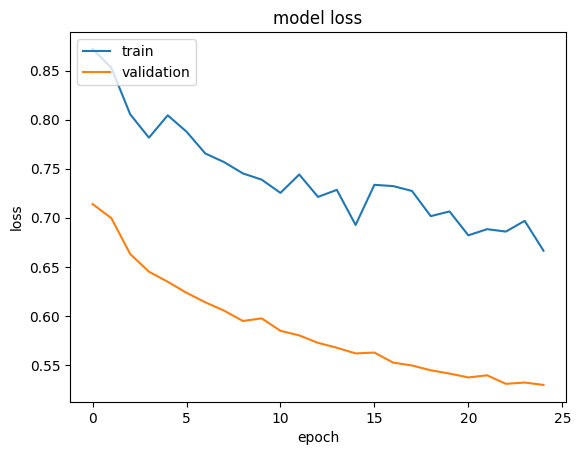

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

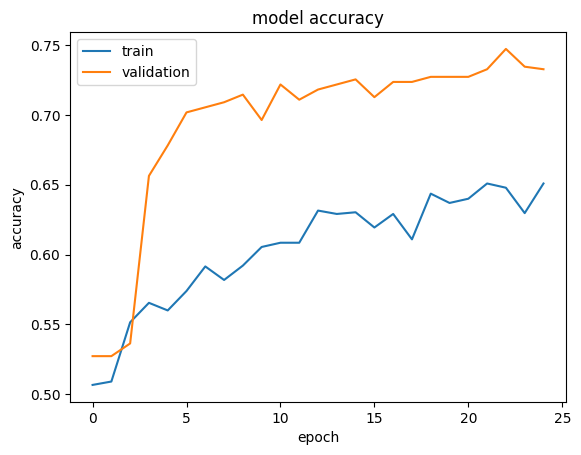

In [23]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

> Our best model is not at the last epoch, so let us implement model checkpoint to save our best model

In [24]:
# defining model checkpointing
from keras.callbacks import ModelCheckpoint

# defining the path to store the weights
filepath="models/best_weights.hdf5"

# defining the model checkpointing and metric to monitor
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# defining checkpointing variable
callbacks_list = [checkpoint]

In [25]:
from keras.layers import BatchNormalization, Dropout
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(50, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

In [26]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [27]:
# training the model
model_history = model.fit(X_train, y_train, epochs=25, batch_size=128,validation_data=(X_valid,y_valid), callbacks=callbacks_list)

Epoch 1/25
13/13 [==============================] - ETA: 0s - loss: 0.8922 - accuracy: 0.5121
Epoch 1: val_accuracy improved from -inf to 0.52727, saving model to models/best_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 6s 366ms/step - loss: 0.8922 - accuracy: 0.5121 - val_loss: 0.7137 - val_accuracy: 0.5273
Epoch 2/25
12/13 [==========================>...] - ETA: 0s - loss: 0.8428 - accuracy: 0.5156
Epoch 2: val_accuracy did not improve from 0.52727
13/13 [==============================] - 1s 74ms/step - loss: 0.8440 - accuracy: 0.5121 - val_loss: 0.7010 - val_accuracy: 0.5273
Epoch 3/25
12/13 [==========================>...] - ETA: 0s - loss: 0.8356 - accuracy: 0.5339
Epoch 3: val_accuracy improved from 0.52727 to 0.52909, saving model to models/best_weights.hdf5
13/13 [==============================] - 1s 109ms/step - loss: 0.8329 - accuracy: 0.5345 - val_loss: 0.6683 - val_accuracy: 0.5291
Epoch 4/25
13/13 [==============================] - ETA: 0s - loss: 0.7939 - accuracy: 0.5418
Epoch 4: val_accuracy improved from 0.52909 to 0.53273, saving model to models/best_weights.hdf5
13/13 [==============================] - 3s 239ms/step - loss: 0.7939 - accuracy:

In [29]:
predictions = model.predict(X_valid)
predictions = predictions.reshape(550,)

# converting probabilities to classes
prediction_int = predictions >= 0.5
prediction_int = prediction_int.astype(np.int)

18/18 [==============================] - 0s 15ms/step


<ipython-input-29-c34d6ffafc63>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [30]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7454545454545455 %


In [33]:
# loading the best model
model.load_weights("models/best_weights.hdf5")

In [34]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(550,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

18/18 [==============================] - 0s 11ms/step


<ipython-input-34-f207ab3dac6e>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [35]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7490909090909091 %


In [36]:
# getting predictions in the form of class
predictions = []
for img_name in tqdm_notebook(test.image_names):
    img = plt.imread('input/images/' + img_name)
    img = img/255.0
    img = img.reshape(1, 224*224*3)
    predictions.append(model.predict(img))

  0%|          | 0/5227 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 51ms/step


In [37]:
predictions = [1 if pred[0][0] > .5 else 0 for pred in predictions]

In [38]:
submission["class"] = predictions
submission.head()

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,1
4,9306.jpg,0


In [39]:
submission.to_csv("results/submission_MLP_Improved.csv", index=False)

## 9. Defining the CNN model architecture

In [8]:
# Import important libraries for the CNN model
from keras.layers import Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout, LeakyReLU

In [9]:
# Reading data again without reshaping
X = []

for img_name in tqdm_notebook(train_sample.image_names):
    img = plt.imread('input/images/' + img_name)
    img = img/255.0
    X.append(img)

X=np.array(X)

y = train_sample["class"].values

  0%|          | 0/1800 [00:00<?, ?it/s]

In [10]:
X.shape

(1800, 224, 224, 3)

In [11]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.25, random_state=SEED)

In [12]:
# Defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Flatten())
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 25)      1900      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 50)      31300     
                                                                 
 flatten (Flatten)           (None, 2332800)           0         
                                                                 
 dense (Dense)               (None, 100)               233280100 
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 233313401 (890.02 MB)
Trainable params: 233313401 (890.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [15]:
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
11/11 [==============================] - 32s 1s/step - loss: 0.8010 - accuracy: 0.5393 - val_loss: 0.6677 - val_accuracy: 0.6111
Epoch 2/10
11/11 [==============================] - 5s 457ms/step - loss: 0.6699 - accuracy: 0.5830 - val_loss: 0.6789 - val_accuracy: 0.5689
Epoch 3/10
11/11 [==============================] - 5s 460ms/step - loss: 0.6533 - accuracy: 0.6333 - val_loss: 0.6310 - val_accuracy: 0.6756
Epoch 4/10
11/11 [==============================] - 5s 471ms/step - loss: 0.6242 - accuracy: 0.6770 - val_loss: 0.6657 - val_accuracy: 0.5444
Epoch 5/10
11/11 [==============================] - 5s 449ms/step - loss: 0.6388 - accuracy: 0.6215 - val_loss: 0.5912 - val_accuracy: 0.7156
Epoch 6/10
11/11 [==============================] - 5s 472ms/step - loss: 0.6357 - accuracy: 0.6748 - val_loss: 0.5852 - val_accuracy: 0.7178
Epoch 7/10
11/11 [==============================] - 5s 449ms/step - loss: 0.6123 - accuracy: 0.6830 - val_loss: 0.5917 - val_accuracy: 0.7089
Epoch 8/

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_train, model.predict(X_train).astype('int')), '%')

In [19]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict(X_valid).astype('int')), '%')

15/15 [==============================] - 1s 37ms/step
Accuracy on validation set: 0.4911111111111111 %


In [ ]:
# getting predictions in the form of class
predictions = []
for img_name in tqdm_notebook(test.image_names):
    img = plt.imread('input/images/' + img_name)
    img = img/255.0
    img = img.reshape(1, 224*224*3)
    predictions.append(model.predict(img))

In [ ]:
predictions = [1 if pred[0][0] > .5 else 0 for pred in predictions]

In [ ]:
submission["class"] = predictions
submission.head()

In [ ]:
submission.to_csv("results/submission_CNN_1.csv", index=False)

## 10. Fine tuning the CNN model

In [13]:
# defining model checkpointing
from keras.callbacks import ModelCheckpoint

# defining the path to store the weights
filepath="models/best_weights.hdf5"

# defining the model checkpointing and metric to monitor
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# defining checkpointing variable
callbacks_list = [checkpoint]

In [28]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))
model.add(Conv2D(32, (7, 7), activation='relu', strides=(1, 1), padding='valid', name="conv1"))
model.add(LeakyReLU(name='lrelu1'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid', name='pool1'))
model.add(Conv2D(32, (4, 4), activation='relu', strides=(1, 1), padding='valid', name="conv2"))
model.add(LeakyReLU(name='lrelu2'))
model.add(MaxPool2D(pool_size=(3, 3), padding='valid', name='pool2'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=50, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid', name='preds'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 218, 218, 32)      4736      
                                                                 
 lrelu1 (LeakyReLU)          (None, 218, 218, 32)      0         
                                                                 
 pool1 (MaxPooling2D)        (None, 109, 109, 32)      0         
                                                                 
 conv2 (Conv2D)              (None, 106, 106, 32)      16416     
                                                                 
 lrelu2 (LeakyReLU)          (None, 106, 106, 32)      0         
                                                                 
 pool2 (MaxPooling2D)        (None, 35, 35, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 39200)            

In [30]:
model_history = model.fit(X_train, y_train, epochs=20, batch_size=128,validation_data=(X_valid,y_valid), callbacks=callbacks_list)

Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.9552 - accuracy: 0.5548
Epoch 1: val_accuracy did not improve from 0.72889
11/11 [==============================] - 7s 301ms/step - loss: 0.9552 - accuracy: 0.5548 - val_loss: 2.7038 - val_accuracy: 0.4933
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.8432 - accuracy: 0.6074
Epoch 2: val_accuracy did not improve from 0.72889
11/11 [==============================] - 3s 245ms/step - loss: 0.8432 - accuracy: 0.6074 - val_loss: 1.1846 - val_accuracy: 0.5467
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.8986 - accuracy: 0.5993
Epoch 3: val_accuracy did not improve from 0.72889
11/11 [==============================] - 2s 201ms/step - loss: 0.8986 - accuracy: 0.5993 - val_loss: 1.6576 - val_accuracy: 0.5178
Epoch 4/20
11/11 [==============================] - ETA: 0s - loss: 0.7745 - accuracy: 0.6452
Epoch 4: val_accuracy did not improve from 0.72889
11/11 [====================

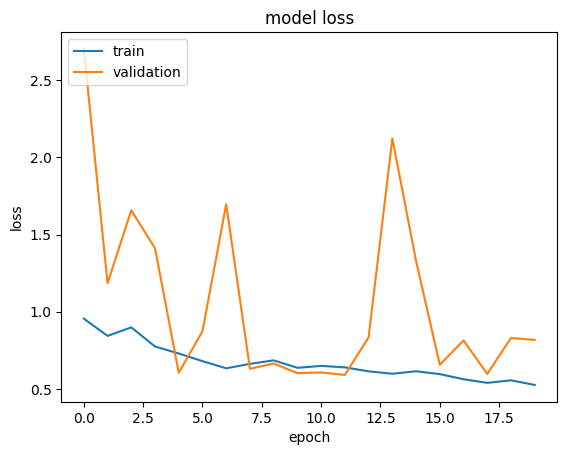

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

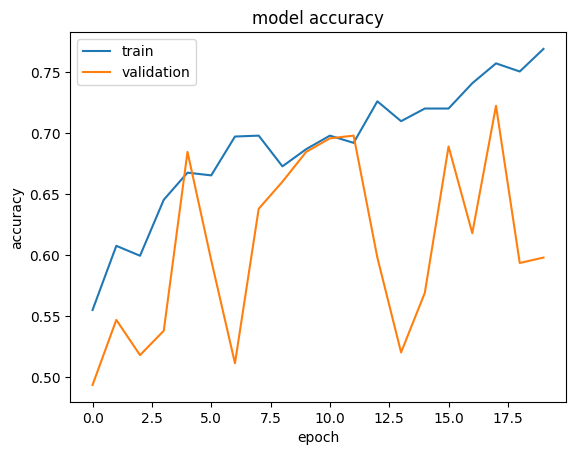

In [32]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict(X_valid)
predictions = predictions.reshape(450,)

# converting probabilities to classes
prediction_int = predictions >= 0.5
prediction_int = prediction_int.astype(np.int)

15/15 [==============================] - 0s 28ms/step


<ipython-input-20-aeae715c1655>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7 %


In [22]:
# loading the best model
model.load_weights("models/best_weights.hdf5")

In [23]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(450,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

15/15 [==============================] - 0s 24ms/step


<ipython-input-23-3fcbfb4cc320>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [24]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7288888888888889 %


In [ ]:
# getting predictions in the form of class
predictions = []
for img_name in tqdm_notebook(test.image_names):
    img = plt.imread('input/images/' + img_name)
    img = img/255.0
    # print(img.shape)
    img = img.reshape(1, 224, 224, 3)
    predictions.append(model.predict(img))

  0%|          | 0/5227 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 44ms/step


In [ ]:
predictions[0]

array([[0.5798325]], dtype=float32)

In [ ]:
predictions = [1 if pred[0][0] > .5 else 0 for pred in predictions]

In [ ]:
submission["class"] = predictions
submission.head()

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,0
4,9306.jpg,0


In [ ]:
submission.to_csv("results/submission_CNN_Tuned_1.csv", index=False)

## 11. Visualizing CNN Model

1. Visualize Filters and Weights
2. Extract Output of Intermediate Neurons/Layers
3. Locate Important parts of Image

### 1. Visualize Filters and Weights

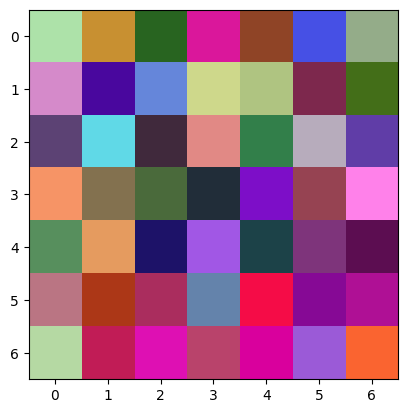

In [33]:
temp = model.get_layer('conv1').get_weights()[0][:, :, :, 0]
temp -= temp.min()
temp /= temp.max()
plt.imshow(temp)

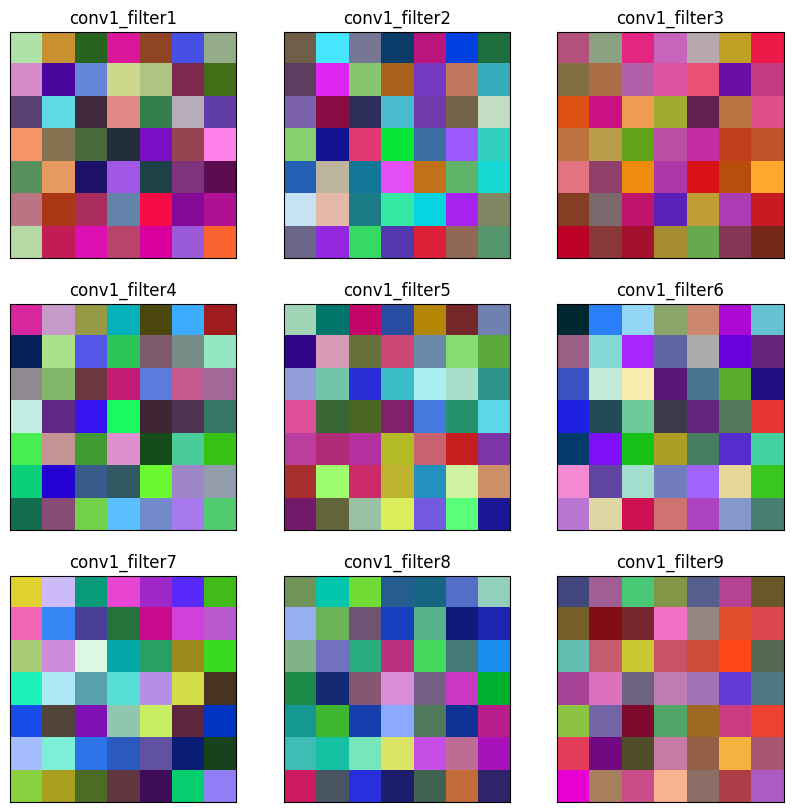

In [34]:
#plot the filters
fig,ax = plt.subplots(nrows=3,ncols=3, figsize=(10, 10))

filter_no = 1
for i in range(3):
    for j in range(3):
        temp = model.get_layer('conv1').get_weights()[0][:, :, :, filter_no - 1]
        temp -= temp.min()
        temp /= temp.max()
        ax[i][j].imshow(temp)
        ax[i][j].set_title('conv1' + '_filter' + str(filter_no))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        filter_no += 1

### 2. Extract Output of Intermediate Neurons/Layers

1/1 [==============================] - 0s 165ms/step


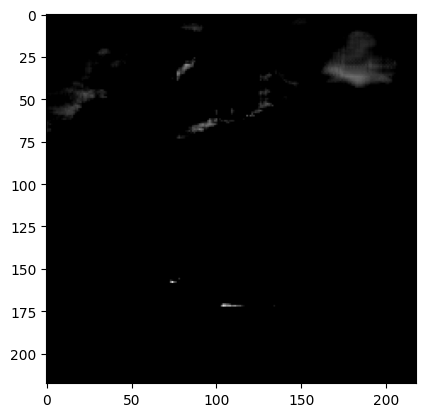

In [35]:
#importing required libraries and functions
from keras.models import Model


eg_image_idx = 5 #for example
image = X_train[eg_image_idx]

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('conv1').output)
intermediate_output = intermediate_layer_model.predict(image)[0, :, :, 0]

plt.imshow(intermediate_output, cmap='gray')

1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 110ms/step


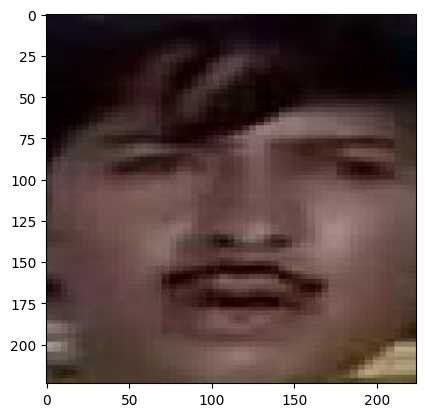

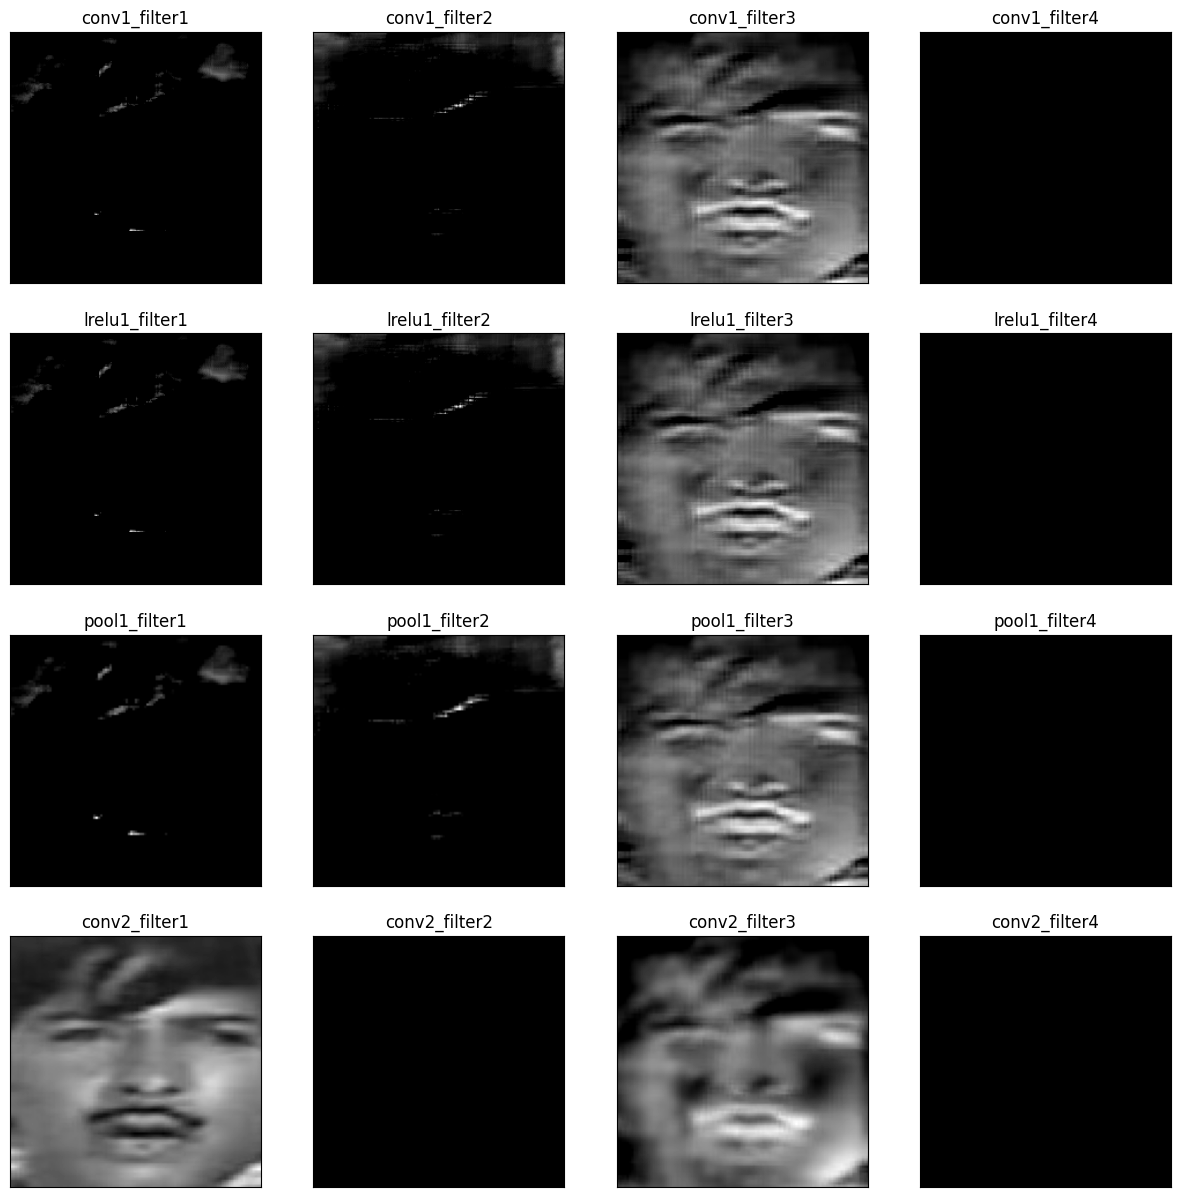

In [37]:
layer_names = ['conv1','lrelu1','pool1', 'conv2']
outputs = []

eg_image_idx = 5 #for example
image = X_train[eg_image_idx]

plt.imshow(image)

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)

#plotting the outputs
fig,ax = plt.subplots(nrows=len(outputs),ncols=4,figsize=(15,15))

for i in range(len(outputs)):
    for z in range(4):
        ax[i][z].imshow(outputs[i][0,:,:,z], cmap='gray')
        ax[i][z].set_title(layer_names[i] + '_filter' + str(z + 1))
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])

### 3. Locate Important parts of Image

Creating heatmap
1/1 [==============================] - 0s 20ms/step


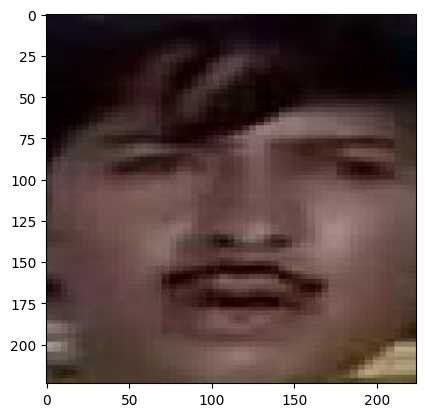

[None]

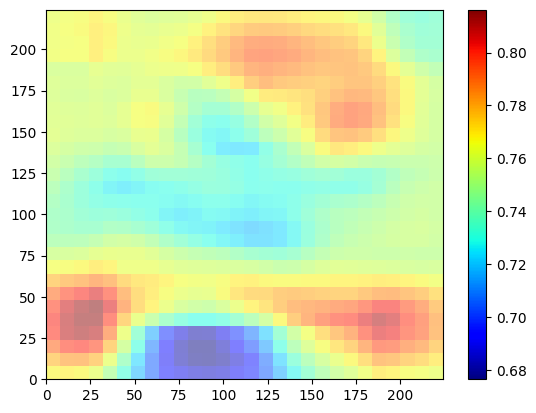

In [38]:
def iter_occlusion(image, size=4):
    # taken from https://www.kaggle.com/blargl/simple-occlusion-and-saliency-maps

   occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
   occlusion_center = np.full((size, size, 1), [0.5], np.float32)
   occlusion_padding = size * 2

   # print('padding...')
   image_padded = np.pad(image, ( \
   (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
   ), 'constant', constant_values = 0.0)

   for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):

       for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
           tmp = image_padded.copy()

           tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
             x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
             = occlusion

           tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

           yield x - occlusion_padding, y - occlusion_padding, \
             tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]

# take example image
image = X_train[eg_image_idx]
correct_class = np.argmax(y_train[eg_image_idx])

# define variables to use
img_size = image.shape[0]
occlusion_size = 8
heatmap = np.zeros((img_size, img_size), np.float32)
class_pixels = np.zeros((img_size, img_size), np.int16)

from collections import defaultdict
counters = defaultdict(int)


print('Creating heatmap')
for n, (x, y, img_float) in enumerate(iter_occlusion(image, size=occlusion_size)):

    X = img_float.reshape(1, 224, 224, 3)
    out = model.predict(X)

    heatmap[y:y + occlusion_size, x:x + occlusion_size] = out[0][correct_class]
    class_pixels[y:y + occlusion_size, x:x + occlusion_size] = np.argmax(out)
    counters[np.argmax(out)] += 1

plt.imshow(image)

plt.show()


plt.pcolormesh(heatmap, cmap=plt.cm.jet, alpha=0.50)
plt.colorbar().solids.set(alpha=1)


## 12. Gender Classification Through Transfer Learning

1. Transfer Learning with Feature Extraction
2. Transfer Learning with Architecture
3. Transfer Learning with Frozen Layers

### 1. Transfer Learning with Feature Extraction

In [42]:
from keras.models import Model
from keras.utils import to_categorical
#used to preprocess data according to VGG16
from keras.applications.vgg16 import preprocess_input
#for instantiating the model and loading the weights and biases
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [43]:
# load images and store it in numpy array
X = []
for img_name in tqdm_notebook(train_sample.image_names):
    img = plt.imread('input/images/' + img_name)
    # img = img/255.0
    X.append(img)

X=np.array(X)

# storing the target variable in separate variable
y = train_sample["class"].values

  0%|          | 0/1800 [00:00<?, ?it/s]

In [44]:
print(y)
y = to_categorical(y)
print(y)

[1 1 1 ... 1 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [45]:
X.min(), X.max(), X.shape

(0, 255, (1800, 224, 224, 3))

In [46]:
X = preprocess_input(X, data_format='channels_last')

In [47]:
X.min(), X.max(), X.shape

(-123.68, 151.061, (1800, 224, 224, 3))

In [48]:
# splitting the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [49]:
X_train.shape

(1260, 224, 224, 3)

> ### Load weights of pretrained model

In [50]:
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3))

553467096/553467096 [==============================] - 9s 0us/step


In [51]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# creating a VGG16 model with imagenet pretrained weights , accepting input of shape (224,224,3)
# also remove the final layers from model(include_top= False)
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

> ### Fine tune the model for the current problem

1. Extract features
2. Flatten the data
3. Rescale features
4. Create a Neural Network Model
5. Compile the model
6. Train and Validate the model

In [ ]:
# extract features using the pretrained VGG16 model
# for training set
base_model_pred = base_model.predict(X_train)
#for validation set
base_model_pred_valid = base_model.predict(X_valid)

19/19 [==============================] - 2s 135ms/step


In [ ]:
#show shape of predictions
base_model_pred.shape

(1400, 7, 7, 512)

In [ ]:
# flattening the model output to one dimension for every sample of training set
base_model_pred = base_model_pred.reshape(1400, 7*7*512)

In [ ]:
base_model_pred.shape

(1400, 25088)

In [ ]:
base_model_pred_valid.shape

(600, 7, 7, 512)

In [ ]:
# flattening the model output to one dimension for every sample of validation set
base_model_pred_valid = base_model_pred_valid.reshape(600, 7*7*512)

In [ ]:
base_model_pred_valid.shape

(600, 25088)

In [ ]:
# checking the min and max of the extracted features
base_model_pred.min(), base_model_pred.max()

(0.0, 199.39473)

In [ ]:
#get maximum value from generated features
max_val = base_model_pred.max()

In [ ]:
#normalizing features generated from the VGG16 model to [0,1]
base_model_pred = base_model_pred / max_val
base_model_pred_valid = base_model_pred_valid / max_val
base_model_pred.min(), base_model_pred.max()

(0.0, 1.0)

In [ ]:
#create a sequential model
model = Sequential()
# add input layer to the model that accepts input of shape 7*7*512
model.add(InputLayer((7*7*512, )))
# add fully connected layer with 1024 neurons and relu activation
model.add(Dense(units=1024, activation='relu'))
# add fully connected layer with 2 neurons and relu activation
model.add(Dense(units=2, activation='softmax'))

In [ ]:
# defining model checkpointing
from keras.callbacks import ModelCheckpoint

# defining the path to store the weights
filepath="models/best_weights.hdf5"

# defining the model checkpointing and metric to monitor
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# defining checkpointing variable
callbacks_list = [checkpoint]

In [ ]:
# compile the model
model.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_3 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25693186 (98.01 MB)
Trainable params: 25693186 (98.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train model using features generated from VGG16 model
model.fit(base_model_pred, y_train, epochs=100, validation_data=(base_model_pred_valid, y_valid), callbacks=callbacks_list)

Epoch 1/100
43/44 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.4804
Epoch 1: val_accuracy improved from -inf to 0.57000, saving model to best_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 2s 28ms/step - loss: 0.6935 - accuracy: 0.4786 - val_loss: 0.6905 - val_accuracy: 0.5700
Epoch 2/100
38/44 [========================>.....] - ETA: 0s - loss: 0.6874 - accuracy: 0.5880
Epoch 2: val_accuracy improved from 0.57000 to 0.61333, saving model to best_weights.hdf5
44/44 [==============================] - 6s 129ms/step - loss: 0.6880 - accuracy: 0.5786 - val_loss: 0.6869 - val_accuracy: 0.6133
Epoch 3/100
42/44 [===========================>..] - ETA: 0s - loss: 0.6826 - accuracy: 0.6265
Epoch 3: val_accuracy did not improve from 0.61333
44/44 [==============================] - 1s 12ms/step - loss: 0.6827 - accuracy: 0.6250 - val_loss: 0.6831 - val_accuracy: 0.6133
Epoch 4/100
43/44 [============================>.] - ETA: 0s - loss: 0.6776 - accuracy: 0.6570
Epoch 4: val_accuracy improved from 0.61333 to 0.63500, saving model to best_weights.hdf5
44/44 [==============================] - 5s 106ms/step - loss: 0.6778 - accuracy: 0.6550 - va

In [ ]:
# get predictions
predictions = model.predict(base_model_pred_valid)
#show predictions
predictions = np.argmax(predictions, axis=1)

19/19 [==============================] - 0s 3ms/step


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(np.argmax(y_valid, axis=1), predictions), '%')

Accuracy on validation set: 0.8316666666666667 %


In [ ]:
# loading the best model
model.load_weights("models/best_weights.hdf5")

In [ ]:
# get predictions
predictions = model.predict(base_model_pred_valid)
#show predictions
predictions = np.argmax(predictions, axis=1)

19/19 [==============================] - 0s 3ms/step


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(np.argmax(y_valid, axis=1), predictions), '%')

Accuracy on validation set: 0.835 %


In [ ]:
# getting predictions in the form of class
predictions = []
for img_name in tqdm_notebook(test.image_names):
    img = np.array([plt.imread('input/images/' + img_name)])
    img = preprocess_input(img)
    img = base_model.predict(img)
    img = img.reshape(1, 7*7*512)
    # print(np.argmax(model.predict(img), axis=1))
    # break
    predictions.append(np.argmax(model.predict(img), axis=1))

  0%|          | 0/5227 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step


In [ ]:
predictions[0]

array([1])

In [ ]:
predictions = [pred[0] for pred in predictions]

In [ ]:
submission["class"] = predictions
submission.head()

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,1
4,9306.jpg,1


In [ ]:
submission.to_csv("results/submission_transfer_1.csv", index=False)

### 2. Transfer Learning with Architecture

In [52]:
base_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [53]:
# creating our own model
from keras.models import Model
x = Dense(100, activation='relu', name='fc1')(base_model.layers[-4].output)
y = Dense(2, activation='softmax', name='prediction')(x)
my_model = Model(inputs=base_model.input, outputs=y)
my_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [54]:
# compile the model
my_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [55]:
# training the model
my_model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
40/40 [==============================] - 45s 684ms/step - loss: 8.8100 - accuracy: 0.4952 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/25
40/40 [==============================] - 18s 442ms/step - loss: 0.6948 - accuracy: 0.5317 - val_loss: 0.6876 - val_accuracy: 0.5630
Epoch 3/25
40/40 [==============================] - 17s 423ms/step - loss: 0.6991 - accuracy: 0.5413 - val_loss: 0.6880 - val_accuracy: 0.5463
Epoch 4/25
40/40 [==============================] - 17s 423ms/step - loss: 0.6901 - accuracy: 0.5611 - val_loss: 0.6714 - val_accuracy: 0.5815
Epoch 5/25
40/40 [==============================] - 17s 427ms/step - loss: 0.6400 - accuracy: 0.6198 - val_loss: 0.6887 - val_accuracy: 0.5130
Epoch 6/25
40/40 [==============================] - 17s 427ms/step - loss: 0.6762 - accuracy: 0.5690 - val_loss: 0.7261 - val_accuracy: 0.5556
Epoch 7/25
40/40 [==============================] - 17s 424ms/step - loss: 0.6269 - accuracy: 0.6667 - val_loss: 0.6199 - val_accuracy: 0.6648

### 3. Transfer Learning with Frozen Layers - train some layers while freeze others

In [56]:
my_model.layers

In [57]:
# to set the first 15 layers to non-trainable (weights will not be updated)
for layer in my_model.layers[:15]:
    layer.trainable = False

In [58]:
# compile the model
my_model.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy')

In [59]:
# training the model
my_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
40/40 [==============================] - 10s 223ms/step - loss: 0.2141 - accuracy: 0.9111 - val_loss: 0.7144 - val_accuracy: 0.7667
Epoch 2/10
40/40 [==============================] - 8s 190ms/step - loss: 0.2012 - accuracy: 0.9246 - val_loss: 0.7944 - val_accuracy: 0.7537
Epoch 3/10
40/40 [==============================] - 8s 203ms/step - loss: 0.1582 - accuracy: 0.9421 - val_loss: 0.8598 - val_accuracy: 0.7722
Epoch 4/10
40/40 [==============================] - 8s 209ms/step - loss: 0.1485 - accuracy: 0.9357 - val_loss: 0.9340 - val_accuracy: 0.7778
Epoch 5/10
40/40 [==============================] - 8s 191ms/step - loss: 0.1343 - accuracy: 0.9444 - val_loss: 0.9506 - val_accuracy: 0.7648
Epoch 6/10
40/40 [==============================] - 8s 207ms/step - loss: 0.1172 - accuracy: 0.9524 - val_loss: 1.0042 - val_accuracy: 0.7815
Epoch 7/10
40/40 [==============================] - 8s 190ms/step - loss: 0.1076 - accuracy: 0.9611 - val_loss: 1.1384 - val_accuracy: 0.7852
Epoch